### FEATURE DETAILS:

- LIMIT_BAL: This feature represents the credit limit assigned to the individual’s credit card. It indicates the maximum amount of credit the person can utilize.

- SEX: This feature represents the gender of the credit card holder. While gender itself may not directly impact credit card fault detection, it can be considered as a demographic factor that might have some influence on creditworthiness.
- EDUCATION: This feature indicates the educational background of the credit card holder. It can provide insights into the person level of education, which might indirectly correlate with their financial stability and ability to manage credit. 
- MARRIAGE: This feature represents the marital status of the credit card holder. Similar to gender, marital status can be a demographic factor that could potentially impact credit card fault detection.
- AGE: This feature denotes the age of the credit card holder. Age can be an important factor in assessing creditworthiness as it often correlates with financial responsibility and stability.
- PAY_0, PAY_2, PAY 3, PAY 4, PAY_5, PAY 6: These features represent the repayment status of the credit card for the past six months. The values indicate the payment status (e.g., -1 represents payment delay for one month, 0 represents payment on time, 1 represents payment delay for two months, and so on). These features are crucial in determining the payment behaviour of the individual over time.
- BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6: These features represent the amount of bill statement for the respective months. They provide information about the outstanding balance on the credit card at specific points in time.
- PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMTS, PAY_AMTG: These features represent the amount of payment made by the credit card holder for the respective months. They Indicate the actual payments made to reduce the outstanding balance.
- default payment next month: This is the target variable or the dependent variable that indicates whether the credit card holder defaulted on their payment in the following month (1 for default, 0 for no default). This is the variable that the credit card fault detection model aims to predict.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Reading csv file:
#/Downloads/creditCardFraud.csv
df = pd.read_csv('creditCardFraud.csv')

In [12]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         1   57     -1      0     -1      0   
1      50000    1          1         2   37      0      0      0      0   
2     500000    1          1         2   29      0      0      0      0   
3     100000    2          2         2   23      0     -1     -1      0   
4     140000    2          3         1   28      0      0      2      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...      20940      19146      19131      2000     36681     10000   
1      0  ...      19394      19619      20024      2500      1815       657   
2      0  ...     542653     483003     473944     55000     40000     38000   
3      0  ...        221       -159        567       380       601         0   
4      0  ...      12211      11793       3719      3329         0       432   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0      9000       689       679                           0  
1      1000      1000       800                           0  
2     20239     13750     13770                           0  
3       581      1687      1542                           0  
4      1000      1000      1000                           0  

[5 rows x 24 columns]

In [11]:
df.shape

(1001, 24)

- dataset has 1001 rows and 24 features

In [6]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

- our dataset has all features as numerical

In [8]:
df.describe()

LIMIT_BAL          SEX    EDUCATION     MARRIAGE          AGE  \
count    1001.000000  1001.000000  1001.000000  1001.000000  1001.000000   
mean   167532.467532     1.589411     1.776224     1.604396    34.945055   
std    130587.921320     0.492187     0.750916     0.532298     9.219760   
min     10000.000000     1.000000     1.000000     0.000000    21.000000   
25%     50000.000000     1.000000     1.000000     1.000000    28.000000   
50%    140000.000000     2.000000     2.000000     2.000000    33.000000   
75%    240000.000000     2.000000     2.000000     2.000000    41.000000   
max    700000.000000     2.000000     6.000000     3.000000    75.000000   

             PAY_0        PAY_2        PAY_3        PAY_4        PAY_5  ...  \
count  1001.000000  1001.000000  1001.000000  1001.000000  1001.000000  ...   
mean     -0.004995    -0.161838    -0.164835    -0.283716    -0.283716  ...   
std       1.173446     1.228732     1.262459     1.184662     1.170224  ...   
min      -2.000000    -2.000000    -2.000000    -2.000000    -2.000000  ...   
25%      -1.000000    -1.000000    -1.000000    -1.000000    -1.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
max       8.000000     7.000000     7.000000     7.000000     7.000000  ...   

           BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean    40748.408591   39078.666334   38012.011988    5382.339660   
std     68206.929510   63108.238729   63074.415024   12180.755275   
min     -3684.000000  -28335.000000 -339603.000000       0.000000   
25%      1423.000000    1206.000000     830.000000    1000.000000   
50%     17710.000000   17580.000000   15846.000000    2184.000000   
75%     48851.000000   46404.000000   46557.000000    5090.000000   
max    628699.000000  484612.000000  473944.000000  199646.000000   

            PAY_AMT2       PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count    1001.000000    1001.000000    1001.000000    1001.000000   
mean     5051.400599    4176.149850    4671.488511    5331.049950   
std     15626.153184   10514.647502   13269.943983   16812.536877   
min         0.000000       0.000000       0.000000       0.000000   
25%       390.000000     228.000000     148.000000     189.000000   
50%      1710.000000    1206.000000    1398.000000    1306.000000   
75%      4500.000000    3720.000000    4000.000000    3745.000000   
max    285138.000000  133657.000000  188840.000000  195599.000000   

            PAY_AMT6  default payment next month  
count    1001.000000                 1001.000000  
mean     5090.704296                    0.213786  
std     23658.888052                    0.410183  
min         0.000000                    0.000000  
25%         0.000000                    0.000000  
50%      1250.000000                    0.000000  
75%      3784.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

In [9]:
# checking for null values:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

- no null values present

In [10]:
# Checking dataset is balanced or imbalanced

df['default payment next month'].value_counts()/df.shape[0]*100

default payment next month
0    78.621379
1    21.378621
Name: count, dtype: float64

- It shows that dataset is slightly imbalance. We have 0's(No Default) as 78.7% and 1's(Default) as 21.3%

C:\Users\admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


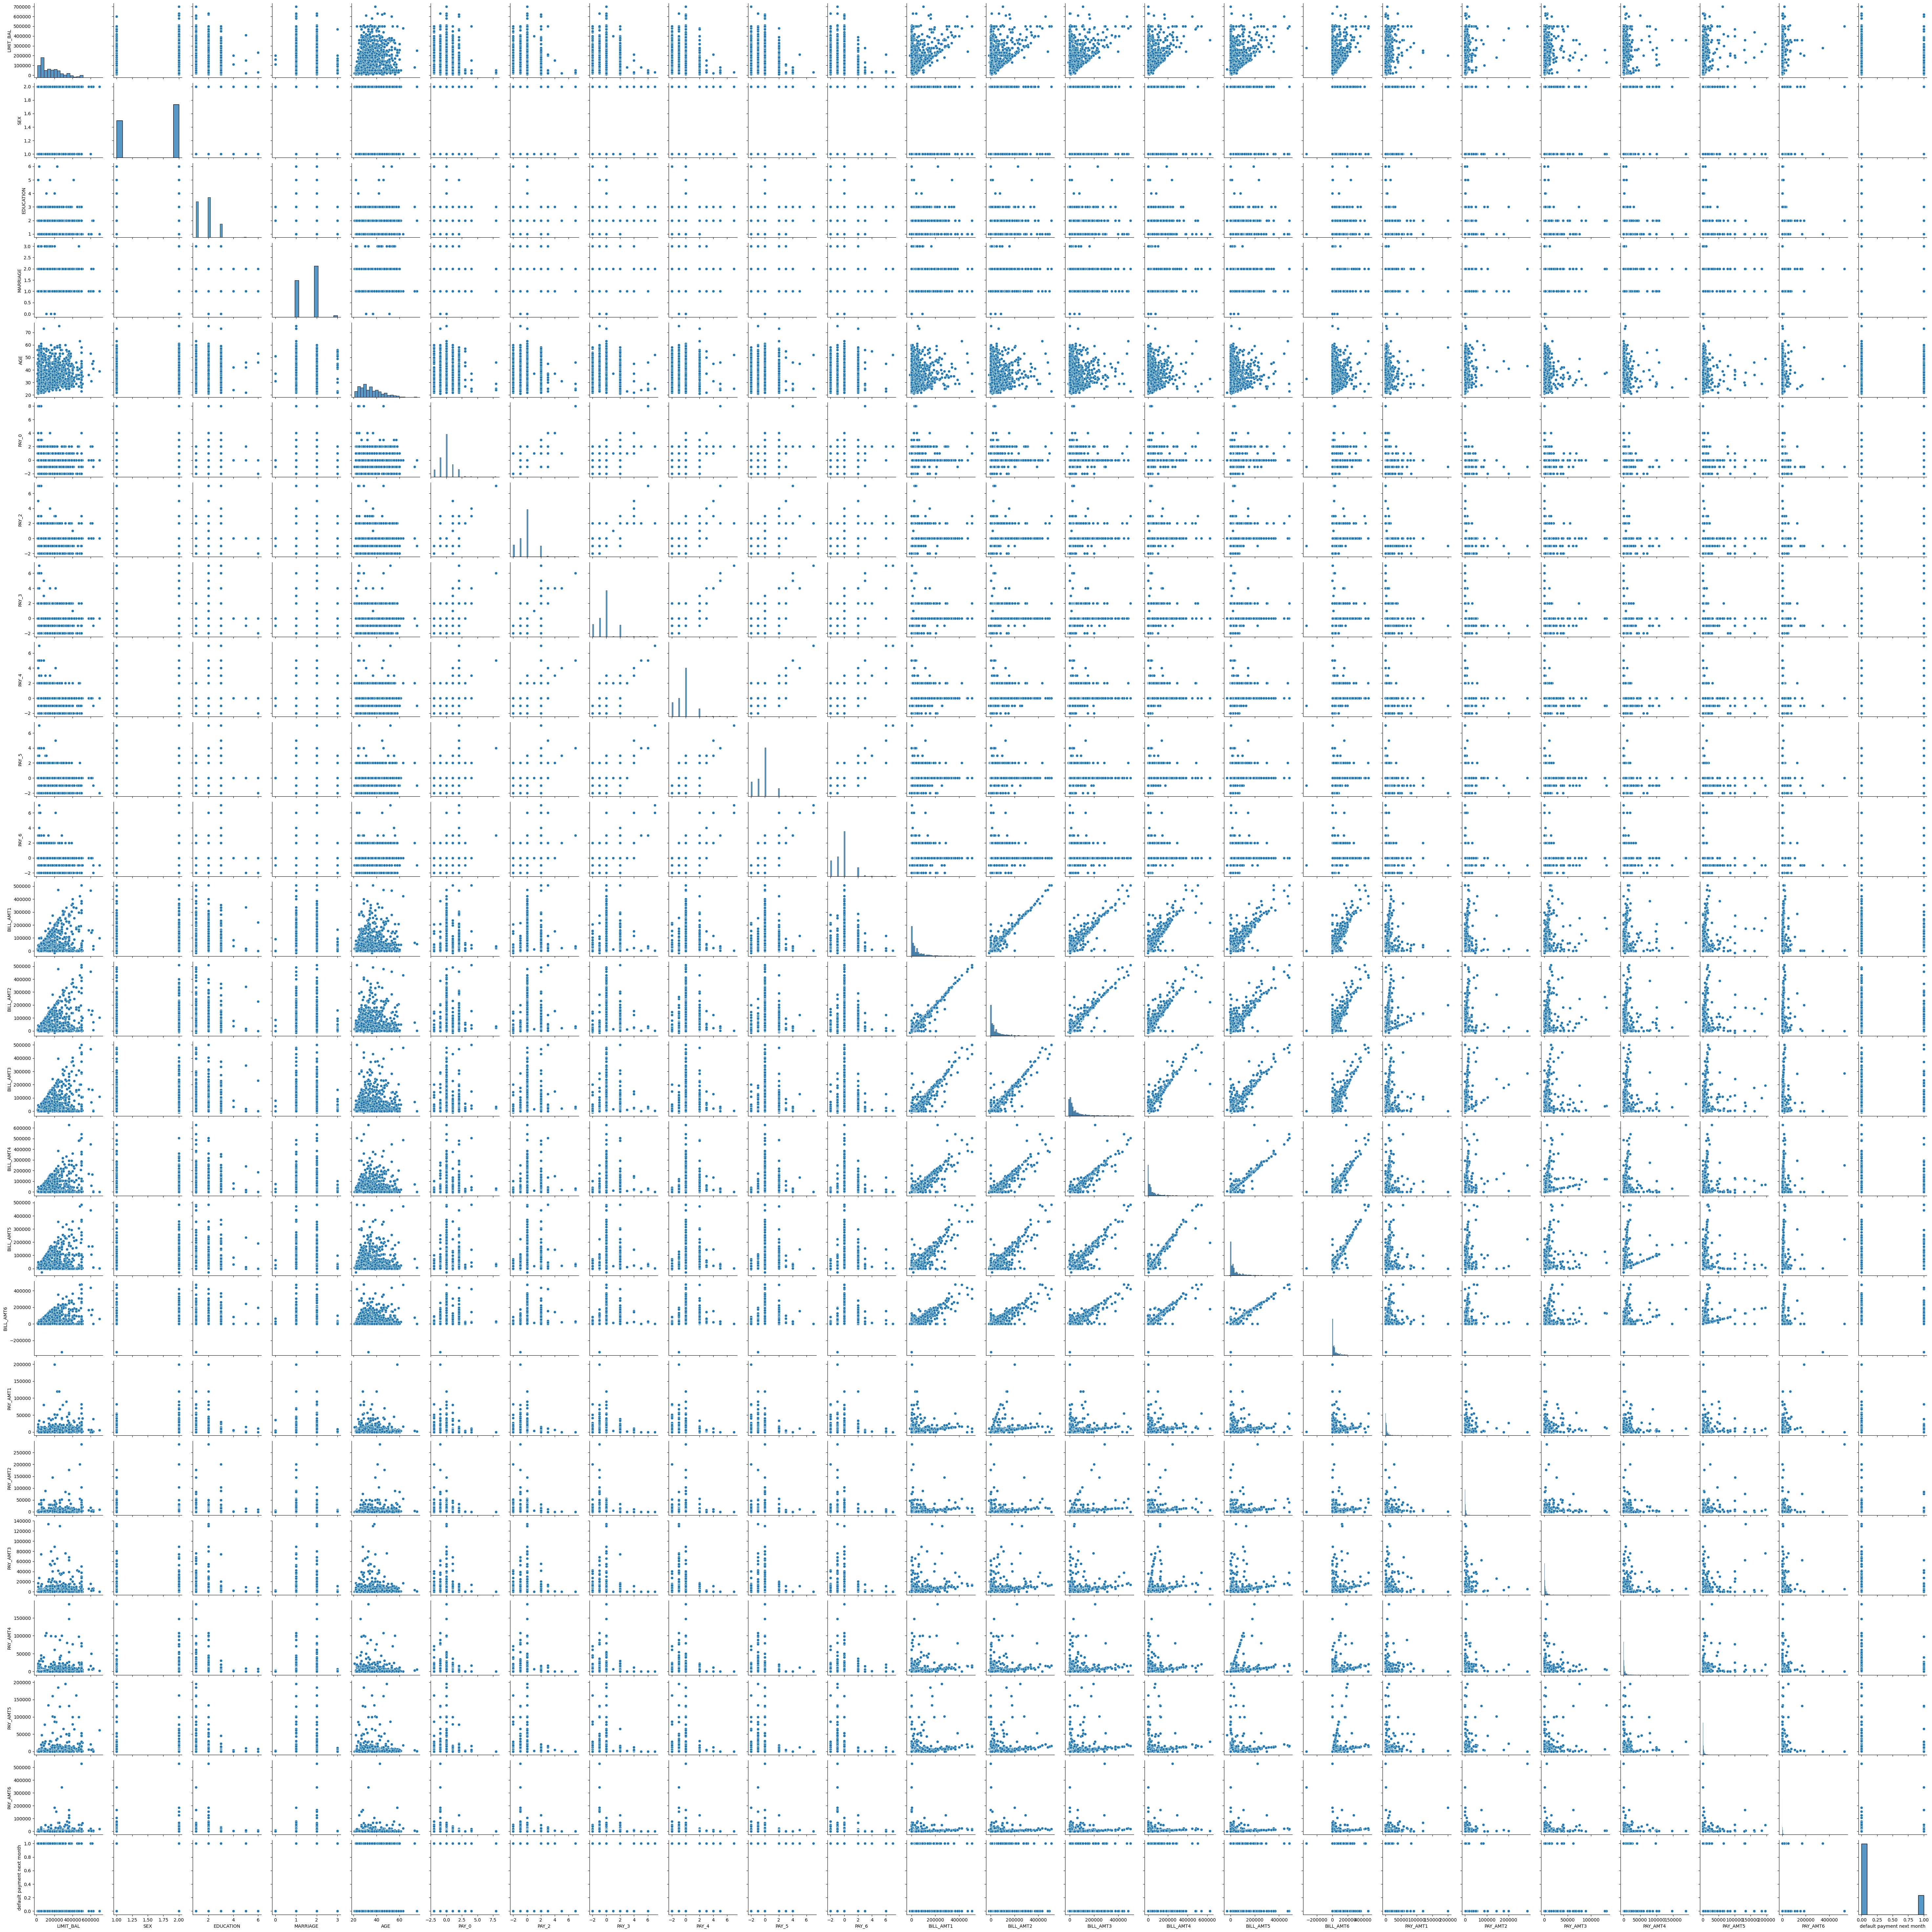

In [11]:
sns.pairplot(df)

<Axes: >

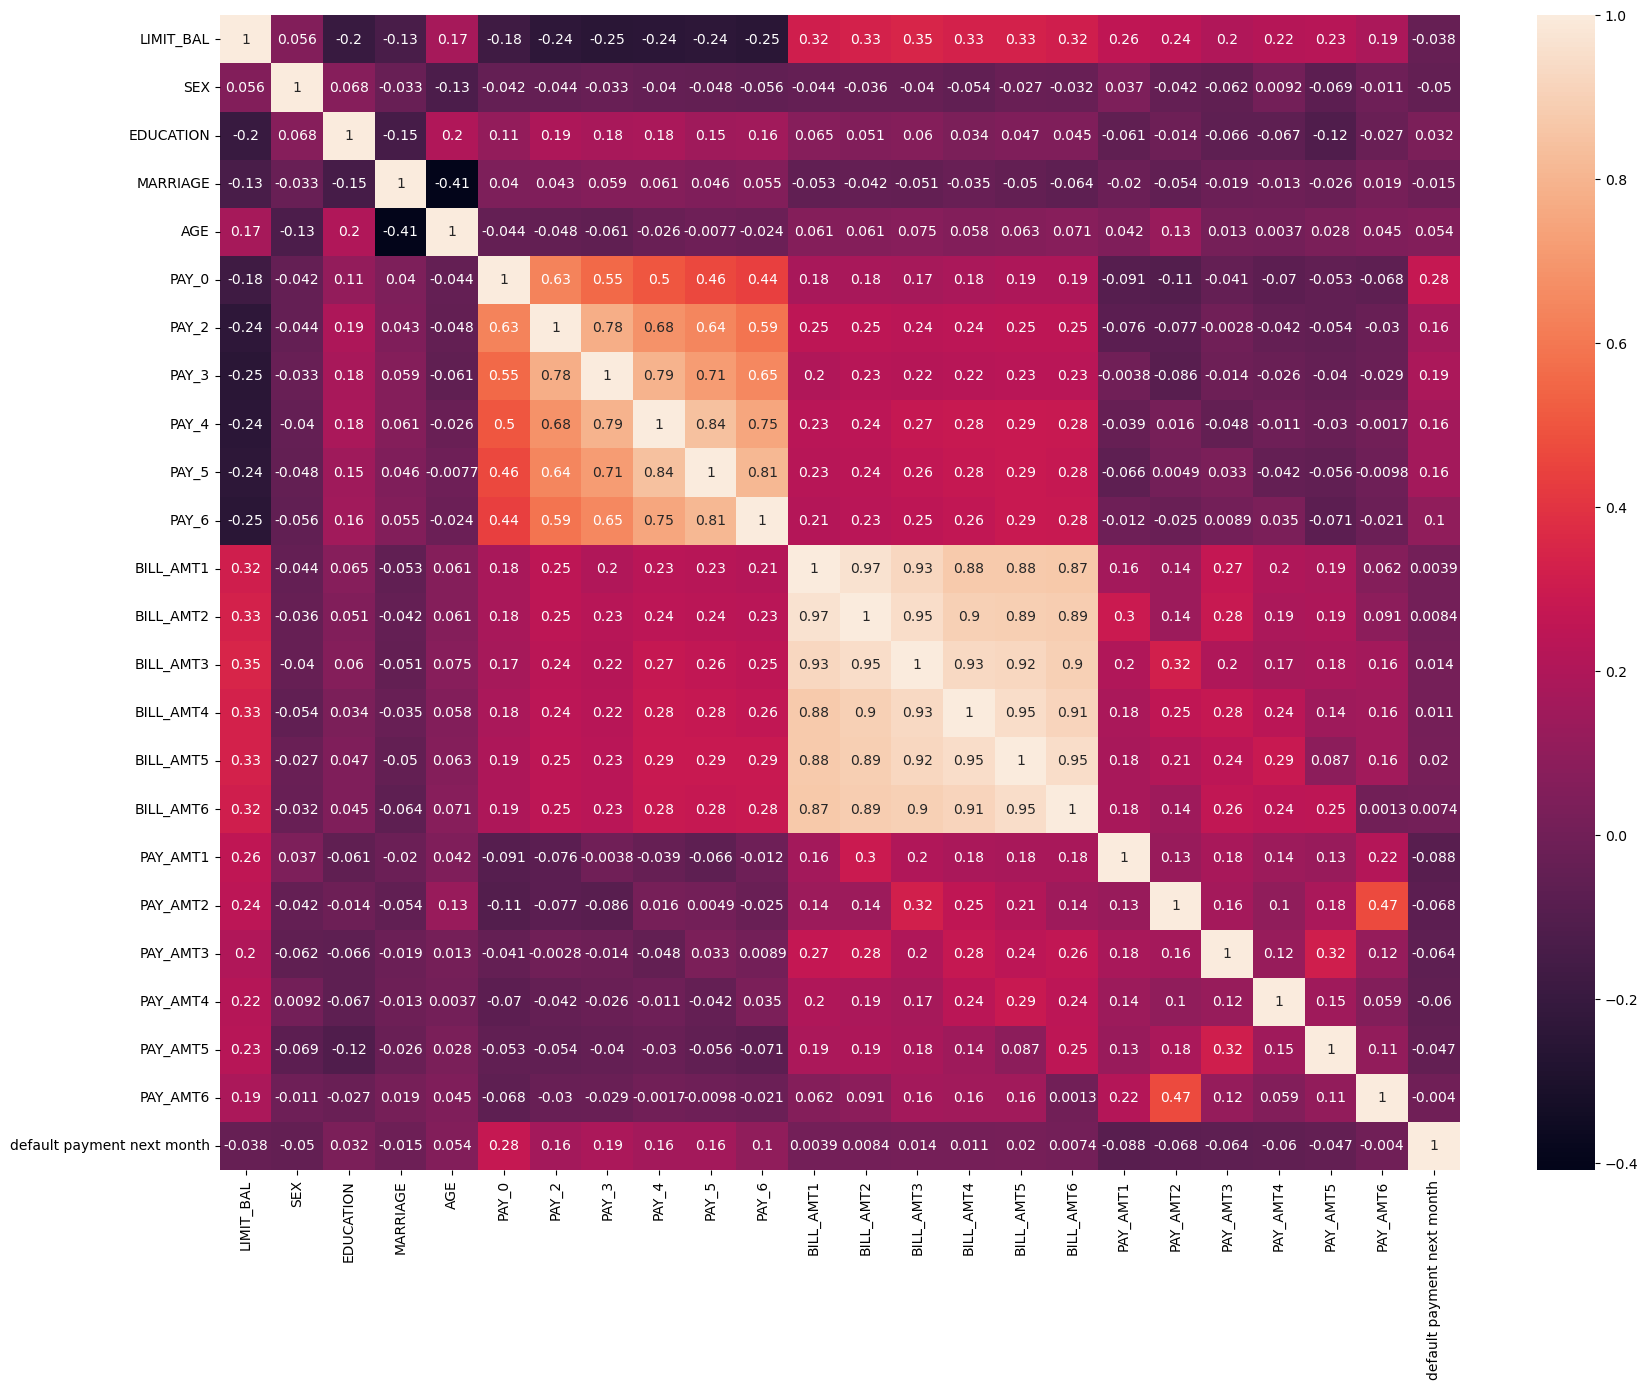

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True )

- there is a bit of correlation among bill_amounts which indicate there is a constant purchasing habit of inviduals over every month. 
- other than that dataset shows low correlation among features.

In [13]:
df.head()

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      50000    1          2         1   57     -1      0     -1      0   
1      50000    1          1         2   37      0      0      0      0   
2     500000    1          1         2   29      0      0      0      0   
3     100000    2          2         2   23      0     -1     -1      0   
4     140000    2          3         1   28      0      0      2      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0      0  ...      20940      19146      19131      2000     36681     10000   
1      0  ...      19394      19619      20024      2500      1815       657   
2      0  ...     542653     483003     473944     55000     40000     38000   
3      0  ...        221       -159        567       380       601         0   
4      0  ...      12211      11793       3719      3329         0       432   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0      9000       689       679                           0  
1      1000      1000       800                           0  
2     20239     13750     13770                           0  
3       581      1687      1542                           0  
4      1000      1000      1000                           0  

[5 rows x 24 columns]

In [13]:
# Finding the count distribution for several features:

_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))

g1 = sns.countplot(x='SEX', data=df, ax = axes[0,0],hue ='default payment next month',palette='inferno')
g2 = sns.countplot(x="EDUCATION", data=df, ax= axes[0,1],hue ='default payment next month',palette='inferno')
g3 = sns.countplot(x='MARRIAGE',data= df, ax=axes[1,0],hue ='default payment next month',palette='inferno')
sns.histplot(x="LIMIT_BAL", data = df, ax =axes[1,1], kde = True,color='red')

g1.legend(fontsize=10)
g2.legend(fontsize=10)
g3.legend(fontsize=10)

### Observation:

- Feature "SEX" : It represents the Gender distribution. Despite having high difference in number of counts for male and female class the number of default payment remains almost same.

- Feature "EDUCATION": It repesents the qualification level of individuals from 1 to 6. It was observed there is just a fraction of individuals belonging to qualification level 4,5 and 6. Also, people from qualification level 2 and 1 contributes in higher numbers for credit usage.

- Feature "MARRIAGE": It represents the Marraige Status of individuals. It seems some unusal noise is present such as 0 and 3 which need to be treated. Apart then this group 2 showcase highest involvement in credit usage.

- Feature "LIMIT_BAL": It represents distribution of credit limit balance. It is observed majority of people have credit limit of 50000/-  

## MODEL BUILDING

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0         50000    1          2         1   57     -1      0     -1      0   
1         50000    1          1         2   37      0      0      0      0   
2        500000    1          1         2   29      0      0      0      0   
3        100000    2          2         2   23      0     -1     -1      0   
4        140000    2          3         1   28      0      0      2      0   
...         ...  ...        ...       ...  ...    ...    ...    ...    ...   
996      100000    1          2         1   29      0      0      0      0   
997      200000    2          2         1   28      0      0      0      0   
998       90000    2          2         1   40     -1     -1     -1     -1   
999      360000    1          1         2   36      1     -2     -2     -2   
1000     150000    2          3         2   30     -2     -2     -2     -2   

      PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
0         0  ...      20940      19146      19131      2000     36681   
1         0  ...      19394      19619      20024      2500      1815   
2         0  ...     542653     483003     473944     55000     40000   
3         0  ...        221       -159        567       380       601   
4         0  ...      12211      11793       3719      3329         0   
...     ...  ...        ...        ...        ...       ...       ...   
996      -1  ...      -2618      95748     101299      3320      5000   
997       0  ...      97041     103541       3632      5000      2000   
998      -1  ...        657       1332        780         0      2806   
999      -2  ...          0          0          0         0         0   
1000     -2  ...       2527          0          0      9664      3420   

      PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0        10000      9000       689       679                           0  
1          657      1000      1000       800                           0  
2        38000     20239     13750     13770                           0  
3            0       581      1687      1542                           0  
4          432      1000      1000      1000                           0  
...        ...       ...       ...       ...                         ...  
996          0    100000      7186         0                           0  
997      89000      6500        91      1504                           0  
998       2256      2274       780         0                           0  
999          0         0         0         0                           1  
1000      2612         0         0         0                           1  

[1001 rows x 24 columns]

In [15]:
X = df.drop(columns = 'default payment next month',axis =1)
y = df['default payment next month']


In [16]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [17]:
X_train.shape,y_train.shape

((750, 23), (750,))

In [18]:
X_test.shape,y_test.shape

((251, 23), (251,))

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [20]:
feature_pipeline = Pipeline(
                            steps=[('imputer',SimpleImputer(strategy='mean')),
                                    ('scaler',StandardScaler())]   
                            )                          

In [21]:
feature_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [22]:
X_train = feature_pipeline.fit_transform(X_train)
X_test = feature_pipeline.transform(X_test)

In [23]:
X_train.shape,X_test.shape

((750, 23), (251, 23))

- As from EDA we found that out target feature is imbalanced. We will perform model training with imbalanced dataset and balanced dataset(oversampling) and finally will conclude the accuracy in both cases.

### Model Selection and Model Training:

In [26]:
!pip install xgboost==1.6.2

     ---------------------------------------- 0.0/125.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/125.4 MB ? eta -:--:--
     ---------------------------------------- 0.1/125.4 MB 1.3 MB/s eta 0:01:37
     ---------------------------------------- 0.2/125.4 MB 2.5 MB/s eta 0:00:50
     ---------------------------------------- 0.3/125.4 MB 2.1 MB/s eta 0:00:59
     ---------------------------------------- 0.3/125.4 MB 2.1 MB/s eta 0:00:59
     ---------------------------------------- 0.3/125.4 MB 1.4 MB/s eta 0:01:33
     ---------------------------------------- 0.4/125.4 MB 1.6 MB/s eta 0:01:18
     ---------------------------------------- 0.5/125.4 MB 1.6 MB/s eta 0:01:18
     ---------------------------------------- 0.5/125.4 MB 1.6 MB/s eta 0:01:18
     ---------------------------------------- 0.5/125.4 MB 1.4 MB/s eta 0:01:32
     ---------------------------------------- 0.6/125.4 MB 1.4 MB/s eta 0:01:28
     ---------------------------------------- 0.6/125.

In [24]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score,roc_curve,precision_recall_curve,average_precision_score


In [25]:
models = {  "Random Forest": RandomForestClassifier(),
            "Decision Tree": DecisionTreeClassifier(),
            "Gradient Boosting": GradientBoostingClassifier(),
            "K-Neighbors Classifier": KNeighborsClassifier(),
            "XGBClassifier": XGBClassifier(),
            "AdaBoost Classifier": AdaBoostClassifier(),
             "Logistic Regression": LogisticRegression()}

In [26]:
def evaluate_model(true, predicted):
    cl_report = classification_report(true, predicted)
    con_mat = confusion_matrix(true, predicted)
    roc_score = roc_auc_score(true,predicted)*100
    acc_score = accuracy_score(true, predicted)*100
    
    return cl_report, con_mat,roc_score, acc_score

In [27]:
def training(models):
    perf = {}
    roc_auc_curve ={}
    p_r_curve={}

    for i in range(len(list(models))):
        model=list(models.values())[i]
        model.fit(X_train,y_train)

        #Make Predictions
        y_train_pred1 = model.predict(X_train)
        y_test_pred1=model.predict(X_test)

        # Computing scores
        cl_report1, con_mat1,roc_score1, acc_score1 = evaluate_model(y_test, y_test_pred1)

        train_score=accuracy_score(y_train,y_train_pred1)*100
        
        
        # Evaluating AUC Curve:
        y_pred_proba = model.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        
        # Evaluating Precision-Recall Curve:
        pr_auc_score = average_precision_score(y_test, y_pred_proba)
        precision, recall,_ = precision_recall_curve(y_test, y_pred_proba)
        
        

        # Storing scores in Dict:
        perf[list(models.keys())[i]] = train_score,acc_score1,roc_score1,pr_auc_score,cl_report1,con_mat1
        roc_auc_curve[list(models.keys())[i]] = fpr,tpr
        p_r_curve[list(models.keys())[i]] = precision,recall
    
    cols = ['Train Accuracy','Test Accuracy','ROC-AUC Score','PR-AUC Score','Classification','Confusion']

    #Converting result into dataframe
    perf_df = pd.DataFrame.from_dict(perf,orient='index', columns=cols)
    perf_df = perf_df.transpose()

    return perf_df,roc_auc_curve,p_r_curve

In [28]:
result_df,roc_auc_curve,p_r_curve = training(models=models)

In [29]:
result_df

Random Forest  \
Train Accuracy                                              100.0   
Test Accuracy                                           84.860558   
ROC-AUC Score                                           60.528455   
PR-AUC Score                                             0.459553   
Classification                precision    recall  f1-score   ...   
Confusion                                    [[203, 7], [31, 10]]   

                                                    Decision Tree  \
Train Accuracy                                              100.0   
Test Accuracy                                           76.095618   
ROC-AUC Score                                           62.160279   
PR-AUC Score                                             0.228613   
Classification                precision    recall  f1-score   ...   
Confusion                                   [[174, 36], [24, 17]]   

                                                Gradient Boosting  \
Train Accuracy                                          91.333333   
Test Accuracy                                           84.462151   
ROC-AUC Score                                           63.234611   
PR-AUC Score                                             0.412679   
Classification                precision    recall  f1-score   ...   
Confusion                                   [[199, 11], [28, 13]]   

                                           K-Neighbors Classifier  \
Train Accuracy                                          82.533333   
Test Accuracy                                            82.47012   
ROC-AUC Score                                           54.192799   
PR-AUC Score                                             0.254891   
Classification                precision    recall  f1-score   ...   
Confusion                                     [[202, 8], [36, 5]]   

                                                    XGBClassifier  \
Train Accuracy                                              100.0   
Test Accuracy                                           84.462151   
ROC-AUC Score                                           66.178862   
PR-AUC Score                                             0.405645   
Classification                precision    recall  f1-score   ...   
Confusion                                   [[196, 14], [25, 16]]   

                                              AdaBoost Classifier  \
Train Accuracy                                          83.066667   
Test Accuracy                                           82.071713   
ROC-AUC Score                                           59.843206   
PR-AUC Score                                             0.331353   
Classification                precision    recall  f1-score   ...   
Confusion                                   [[195, 15], [30, 11]]   

                                              Logistic Regression  
Train Accuracy                                          77.733333  
Test Accuracy                                           86.055777  
ROC-AUC Score                                           59.279907  
PR-AUC Score                                             0.445575  
Classification                precision    recall  f1-score   ...  
Confusion                                     [[208, 2], [33, 8]]

- In order to classify the fradulent and non fradulent credit holders, high accuracies alone won't help. We need to lookup for ROC_AUC scores and Precision Recall scores to prioritize the ability of the model to distinguish between the positive(1) and negative(0) classes effectively.
- This is an imbalanced datasets, with far fewer fraudulent cases than legitimate transactions.
- In such scenarios, PR-AUC (Precision-Recall AUC) is often a more informative metric than ROC AUC, as it better captures the model's ability to identify the minority class (fraudulent cases).

In [24]:
# Evaluating Curves:

fig,ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Evalaution Curves')

# Evaluating ROC Curve:

for key,value in roc_auc_curve.items():
    ax[0].plot(value[0],value[1],label=key)
    

ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_title('ROC CURVE')
ax[0].legend()


# Evaluating Precision Recall Curve:

for key,value in p_r_curve.items():
    ax[1].plot(value[0],value[1],label=key)
    

ax[1].set_ylabel('Recall')
ax[1].set_xlabel('Precision')
ax[1].set_title('Recall - Precision Curve')
ax[1].legend()

fig.tight_layout()
plt.show()   

In [25]:
# Showing results
for i in result_df:
    print(i)
    for j in range(len(result_df[i])):
        print(f'{result_df.index[j]}: {result_df[i][j]}')
        
    print('*'*100,'\n')

Random Forest
Train Accuracy: 100.0
Test Accuracy: 86.05577689243027
ROC-AUC Score: 64.1869918699187
PR-AUC Score: 0.4517505710812938
Classification:               precision    recall  f1-score   support

           0       0.88      0.97      0.92       210
           1       0.65      0.32      0.43        41

    accuracy                           0.86       251
   macro avg       0.76      0.64      0.67       251
weighted avg       0.84      0.86      0.84       251

Confusion: [[203   7]
 [ 28  13]]
**************************************************************************************************** 

Decision Tree
Train Accuracy: 100.0
Test Accuracy: 73.70517928286853
ROC-AUC Score: 61.71312427409988
PR-AUC Score: 0.22118164686316708
Classification:               precision    recall  f1-score   support

           0       0.88      0.80      0.83       210
           1       0.30      0.44      0.35        41

    accuracy                           0.74       251
   macro avg    

- Report Summary:
1. Random Forest, Decision Tree, XGBClassifier shows 100% train accuracy and high difference in test and train accuracy which leads to overfitting issue.
2. While KNeighbours, Logistic Regression & AdaBoost Classifier had lowest difference followed by Gradient Boosting in train and test accuracy which is good for a generalised model.
3. In case of fraud detection: 
    - High precision ensures that fewer legitimate transactions are mistakenly flagged, reducing these negative impacts.
    - High recall minimizes false negatives, maximizing the detection rate of actual fraud attempts.
4. Logistic Regression looks promising due to its highest test accuracy, moderate AUC scores, and simpler model structure.
5. Gradient Boosting shows good performance without significant overfitting concerns.
6. AdaBoost performs competitively on PR-AUC but falls slightly behind on other metrics.

-- However, before finalizing our model we will perform cross validation and hyperparameter tuning to ensure increase in effectives of model performances


In [28]:
# Hyperparameter Tunning:


params={
    "Random Forest": {
        'criterion':['gini', 'entropy'],
            'n_estimators':[32,70,90,100,120,150],
            'max_features':['sqrt','log2'],
    },
    "Decision Tree":{
        'criterion':['gini', 'entropy'],
        'max_features':['sqrt','log2', None],
        'splitter': ['best','random']
    },
    "Gradient Boosting":{
        'loss':['log_loss', 'exponential'],
        'learning_rate':[0.001,0.01,0.1,0.05,0.005],
        'n_estimators':[32,70,100,120,150],
        'criterion':['friedman_mse', 'squared_error']
    },
    "K-Neighbors Classifier":{
        'n_neighbors':[3,5,8,12,15],
        'weights':['uniform', 'distance']
    },

    "XGBClassifier":{
        'booster':['gbtree', 'gblinear','dart']
    },
    "AdaBoost Classifier":{
        'algorithm':['SAMME', 'SAMME.R'],
        'learning_rate':[0.001,0.01,0.1,0.05],
        'n_estimators':[20,32,70,100]
    },
    "Logistic Regression":{
        'penalty':['l2'],
        'solver':['lbfgs', 'newton-cg', 'newton-cholesky'],
        'C':[0.01,0.05,0.1,0.5,1]
    },

}

In [26]:
def hyp_training(models,params):
    report={}
    roc_auc_curve1 ={}
    p_r_curve1={}
        
    for i in range(len(list(models))):
        model=list(models.values())[i]
        param=params[list(models.keys())[i]]
        gs = GridSearchCV(estimator=model,param_grid=param, cv=3)
        gs.fit(X_train,y_train)

        model.set_params(**gs.best_params_)
        model.fit(X_train,y_train)

        #Make Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred=model.predict(X_test)

        # print('Model Training Performance')
        cl_report, con_mat,roc_score, test_acc_score = evaluate_model(y_test, y_test_pred)
        train_acc_score = accuracy_score(y_train,y_train_pred)*100
        
         # Evaluating AUC Curve:
        y_pred_proba1 = model.predict_proba(X_test)[::,1]
        fpr1, tpr1, _ = roc_curve(y_test, y_pred_proba1)
        
        # Evaluating Precision-Recall Curve:
        pr_auc_score1 = average_precision_score(y_test, y_pred_proba1)
        precision1, recall1,_ = precision_recall_curve(y_test, y_pred_proba1)

        report[list(models.keys())[i]] = train_acc_score,test_acc_score,roc_score,pr_auc_score1,cl_report,con_mat
        roc_auc_curve1[list(models.keys())[i]] = fpr1,tpr1
        p_r_curve1[list(models.keys())[i]] = precision1,recall1

    cols = ['Train Accuracy','Test Accuracy','ROC-AUC Score','PR-AUC Score','Classification','Confusion']

    report_df = pd.DataFrame.from_dict(report,orient='index', columns=cols)
    report_df = report_df.transpose()

    return report_df,roc_auc_curve1,p_r_curve1

In [29]:
report_df,roc_auc_curve1,p_r_curve1 = hyp_training(models,params)

[23:05:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[23:05:57] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "ma

In [30]:
report_df

Random Forest  \
Train Accuracy                                              100.0   
Test Accuracy                                           84.462151   
ROC-AUC Score                                            60.29036   
PR-AUC Score                                             0.450578   
Classification                precision    recall  f1-score   ...   
Confusion                                    [[202, 8], [31, 10]]   

                                                    Decision Tree  \
Train Accuracy                                              100.0   
Test Accuracy                                           79.681275   
ROC-AUC Score                                           64.303136   
PR-AUC Score                                             0.255817   
Classification                precision    recall  f1-score   ...   
Confusion                                   [[183, 27], [24, 17]]   

                                                Gradient Boosting  \
Train Accuracy                                               87.2   
Test Accuracy                                           84.063745   
ROC-AUC Score                                           60.052265   
PR-AUC Score                                             0.461143   
Classification                precision    recall  f1-score   ...   
Confusion                                    [[201, 9], [31, 10]]   

                                           K-Neighbors Classifier  \
Train Accuracy                                          78.933333   
Test Accuracy                                           84.860558   
ROC-AUC Score                                           58.565621   
PR-AUC Score                                             0.405903   
Classification                precision    recall  f1-score   ...   
Confusion                                     [[205, 5], [33, 8]]   

                                                    XGBClassifier  \
Train Accuracy                                               76.8   
Test Accuracy                                           83.266932   
ROC-AUC Score                                           49.761905   
PR-AUC Score                                             0.360155   
Classification                precision    recall  f1-score   ...   
Confusion                                     [[209, 1], [41, 0]]   

                                              AdaBoost Classifier  \
Train Accuracy                                          79.733333   
Test Accuracy                                           84.462151   
ROC-AUC Score                                           61.271777   
PR-AUC Score                                             0.298463   
Classification                precision    recall  f1-score   ...   
Confusion                                    [[201, 9], [30, 11]]   

                                              Logistic Regression  
Train Accuracy                                               77.6  
Test Accuracy                                           86.055777  
ROC-AUC Score                                           59.279907  
PR-AUC Score                                             0.443293  
Classification                precision    recall  f1-score   ...  
Confusion                                     [[208, 2], [33, 8]]

In [31]:
# Evaluating Curves:

fig,ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Evalaution Curves after HP Tuning')

# Evaluating ROC Curve:

for key,value in roc_auc_curve1.items():
    ax[0].plot(value[0],value[1],label=key)
    

ax[0].set_ylabel('True Positive Rate')
ax[0].set_xlabel('False Positive Rate')
ax[0].set_title('ROC CURVE')
ax[0].legend()


# Evaluating Precision Recall Curve:

for key,value in p_r_curve1.items():
    ax[1].plot(value[0],value[1],label=key)
    

ax[1].set_ylabel('Recall')
ax[1].set_xlabel('Precision')
ax[1].set_title('Recall - Precision Curve')
ax[1].legend()

fig.tight_layout()
plt.show()   

In [32]:
for i in report_df:
    print(i)
    for j in range(len(report_df[i])):
        print(f'{report_df.index[j]}: {report_df[i][j]}')
        
    print('*'*100,'\n')

Random Forest
Train Accuracy: 100.0
Test Accuracy: 84.4621513944223
ROC-AUC Score: 60.2903600464576
PR-AUC Score: 0.45057834381021467
Classification:               precision    recall  f1-score   support

           0       0.87      0.96      0.91       210
           1       0.56      0.24      0.34        41

    accuracy                           0.84       251
   macro avg       0.71      0.60      0.63       251
weighted avg       0.82      0.84      0.82       251

Confusion: [[202   8]
 [ 31  10]]
**************************************************************************************************** 

Decision Tree
Train Accuracy: 100.0
Test Accuracy: 79.6812749003984
ROC-AUC Score: 64.30313588850174
PR-AUC Score: 0.25581708642149803
Classification:               precision    recall  f1-score   support

           0       0.88      0.87      0.88       210
           1       0.39      0.41      0.40        41

    accuracy                           0.80       251
   macro avg     

- Report Summary after HP Tuning:

1. Random Forest, Decision Tree shows, Logistic Regression and XGBClassifier had high difference in test and train accuracy which leads to overfitting issue.
2. While KNeighbours, AdaBoost Classifier had lowest difference followed by Gradient Boosting in train and test accuracy which is good for a generalised model.
3. Logistic Regression looks promising due to its highest test accuracy and moderate AUC scores but it tends to cause overfitting .
5. Gradient Boosting shows good performance without significant overfitting concerns, moderate accuracy(84.02) and relevantly higher AUC scores than Logistic Regression.
6. AdaBoost performs competitively on other maetrics but falls slightly behind on PR-AUC score compare to Gradient Boosting and Logistic Regression.

- For a generalize consideration we can opt for Gradient Boosting as it seems promising over PR-AUC, ROC-AUC score along with relatively decent accuracy.